# K-Means Clustering

K-Means is an **unsupervised machine learning algorithm** used for **clustering** data into groups (or "clusters"). It is commonly applied in **data mining, pattern recognition, and image segmentation**.



## How K-Means Works
1. **Choose the Number of Clusters (K):**  
   You decide how many clusters (K) you want to divide your data into.

2. **Initialize Centroids:**  
   - Randomly select K points from the dataset as initial cluster centers (centroids).
   - These centroids will be updated as the algorithm progresses.

3. **Assign Points to the Nearest Centroid:**  
   - For each data point, compute its distance (e.g., Euclidean distance) to each centroid.
   - Assign the data point to the nearest centroid’s cluster.

4. **Update Centroids:**  
   - Compute the **mean (average)** of all points in each cluster.
   - Set the new centroid of each cluster as this mean.

5. **Repeat Steps 3 & 4 Until Convergence:**  
   - The algorithm keeps updating centroids and reassigning points until:
     - The centroids stop changing significantly, or
     - A maximum number of iterations is reached.


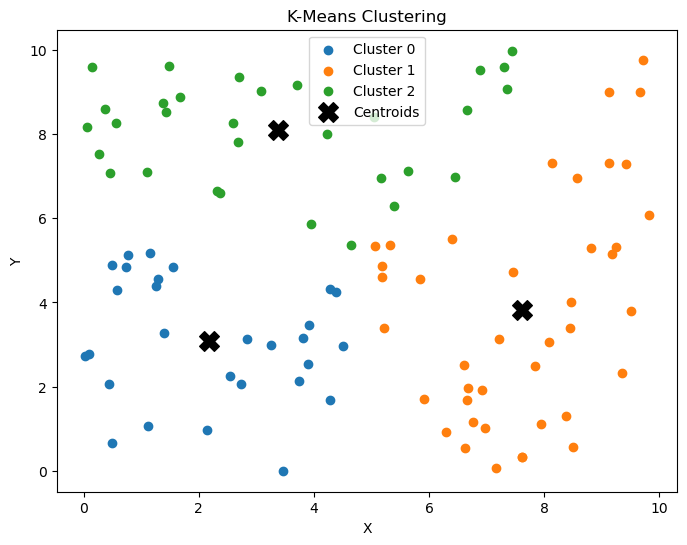

Centroids:
[[2.18622512 3.09499998]
 [7.60933758 3.80988572]
 [3.37167233 8.08169576]]

Cluster Assignments:
          x         y  cluster
0  1.394125  3.267504        0
1  4.286314  4.307922        0
2  1.426160  8.522127        2
3  7.841200  2.485436        1
4  6.605724  2.519278        1


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol  # Tolerance for convergence
        self.centroids = None
    
    def fit(self, X):
        # Convert input to NumPy array
        X = np.array(X)
        
        # Randomly initialize centroids by choosing k random points from X
        np.random.seed(42)  # For reproducibility
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        
        for _ in range(self.max_iters):
            # Assign each point to the nearest centroid
            clusters = self._assign_clusters(X)
            
            # Compute new centroids
            new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(self.k)])
            
            # Check for convergence (if centroids don’t change much)
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            
            self.centroids = new_centroids
        
    def _assign_clusters(self, X):
        # Compute distances from each point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)  # Assign each point to the closest centroid
    
    def predict(self, X):
        X = np.array(X)
        return self._assign_clusters(X)
    
# Example Usage
data = pd.DataFrame({
    "x": np.random.rand(100) * 10,
    "y": np.random.rand(100) * 10
})

# Convert DataFrame to NumPy array
X = data.to_numpy()

# Run K-Means
kmeans = KMeans(k=3)
kmeans.fit(X)

# Predict cluster labels
labels = kmeans.predict(X)
data["cluster"] = labels

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(data[data["cluster"] == i]["x"], data[data["cluster"] == i]["y"], label=f"Cluster {i}")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering")
plt.show()

# Print results
print("Centroids:")
print(kmeans.centroids)
print("\nCluster Assignments:")
print(data.head())


In [19]:
# added this cell for suppressing warnings

import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.filterwarnings('ignore')




## K-means using sk-learn

Suppose we have a dataset of customer spending habits, and we want to categorize them into 3 groups (K=3):

- Initially, 3 random points are chosen as centroids.
- Each customer is assigned to the nearest centroid.
- The centroids are updated to reflect the mean of their respective clusters.
- The process repeats until clusters stabilize.


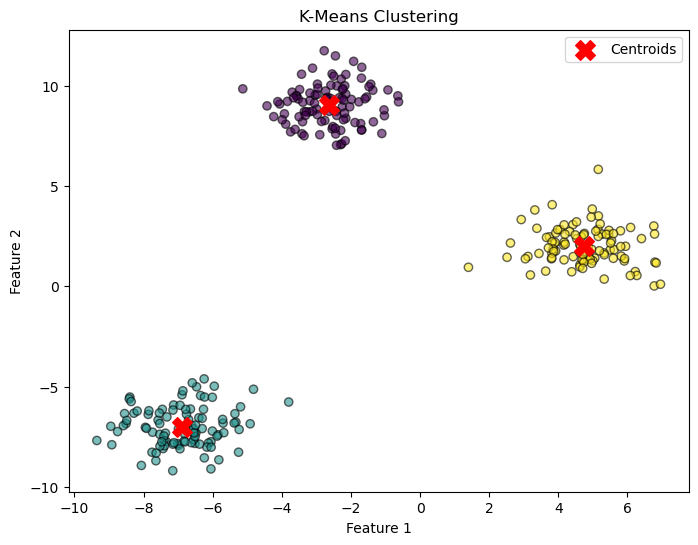

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### Real life example of K-means clustering

Let's apply **K-Means clustering** to a real-world dataset: **Iris dataset** 🌸, which contains flower measurements. We'll cluster the flowers into groups based on their features.

### **Steps**
1. **Load Data**: The `Iris dataset` contains 150 flower samples, each with 4 features.
2. **Feature Scaling**: Since K-Means is sensitive to different scales, we normalize the data using `StandardScaler()`.
3. **Apply K-Means**: We set `K=3` (since there are 3 known Iris species).
4. **Dimensionality Reduction**: Since we have 4 features, we use **PCA (Principal Component Analysis)** to project data onto 2D for visualization.
5. **Plot Clusters**: Data points are colored by their cluster labels, and centroids are marked in red.



Would you like to explore how to **find the optimal number of clusters (K)** using the **Elbow Method**? 📈

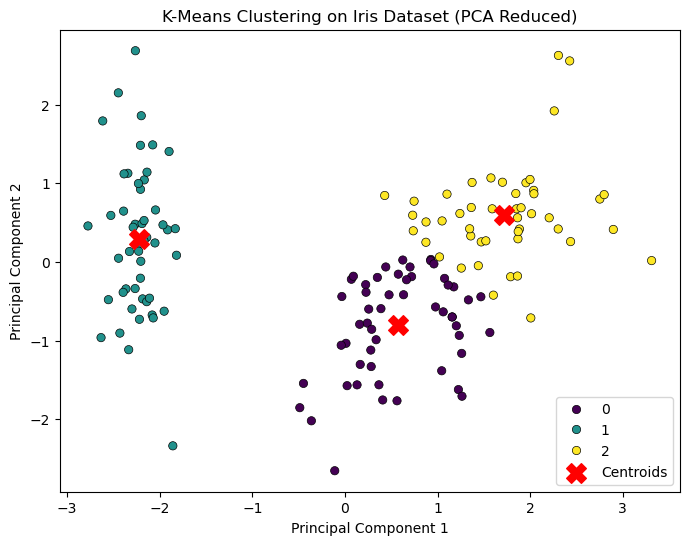

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with K=3 (since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Reduce dimensions using PCA for visualization (from 4D to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Transform the cluster centers to the same PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Cluster Evaluation Metrics

- **Elbow Method** – Helps determine the optimal number of clusters.  
- **Silhouette Score** – Measures how similar a point is to its cluster compared to others.  
- **Davies-Bouldin Index** – Evaluates clustering quality by considering intra-cluster similarity and inter-cluster separation.  


### Finding the Optimal Number of Clusters (K) using the Elbow Method 📈  

The **Elbow Method** helps determine the best number of clusters by plotting the **Within-Cluster Sum of Squares (WCSS)** for different values of K. The "elbow" in the plot is where adding more clusters **stops significantly reducing WCSS**, meaning it's a good choice for K.


### **How to Interpret the Elbow Plot**
- The **X-axis** represents the number of clusters (K).
- The **Y-axis** shows the **WCSS** (how compact the clusters are).
- The **elbow point** is where the WCSS stops decreasing sharply.
- The optimal K is where adding more clusters **doesn’t significantly reduce WCSS**.


### **Example Result**
If the elbow appears at **K=3**, it suggests that **3 clusters** is the best choice for this dataset (which aligns with the 3 known Iris species).


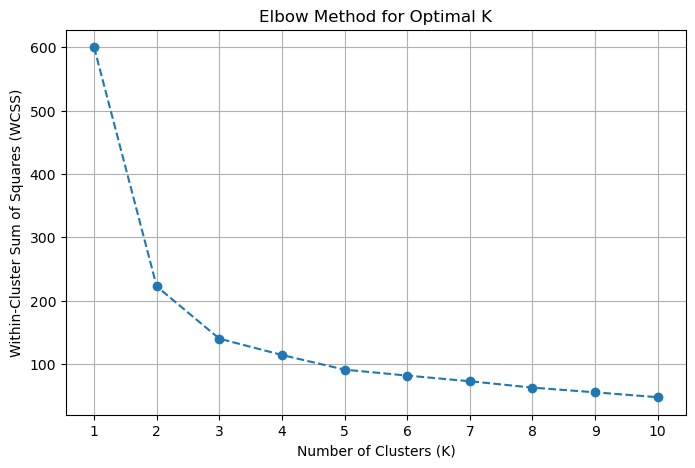

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of K
wcss = []  # Store Within-Cluster Sum of Squares
K_range = range(1, 11)  # Test K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS (sum of squared distances)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### Silhouette Score: Evaluating Clustering Quality 📊  

The **Silhouette Score** is another way to evaluate the quality of clustering. It measures how well each data point fits within its assigned cluster compared to the nearest other cluster.  

#### **Silhouette Score Formula**  
For each data point \( i \):  

\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

where:
- \( a(i) \) = average distance from \( i \) to other points in the same cluster.
- \( b(i) \) = average distance from \( i \) to points in the nearest different cluster.
- \( s(i) \) ranges from **-1 to 1**:
  - **Close to 1** → Well-clustered  
  - **Close to 0** → Overlapping clusters  
  - **Close to -1** → Misclassified  


#### **How to Interpret the Silhouette Score Plot**
- The **X-axis** represents the number of clusters (**K**).
- The **Y-axis** represents the **Silhouette Score**.
- The **peak value** indicates the best number of clusters.

For the **Iris dataset**, the best K is usually **3**, aligning with the real species labels.


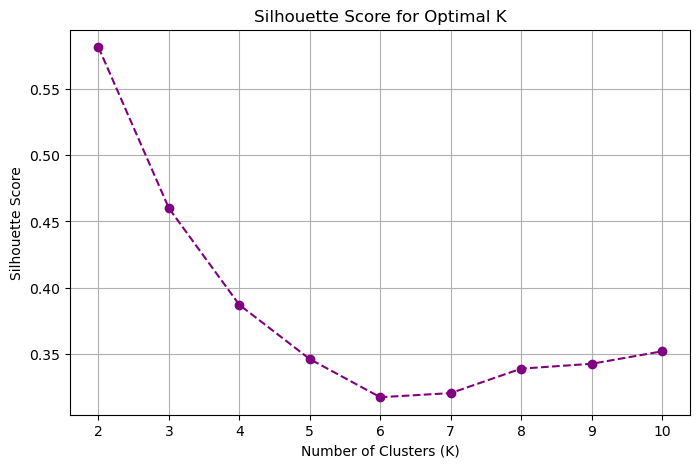

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of K
silhouette_scores = []
K_range = range(2, 11)  # K must be at least 2

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### Davies-Bouldin Index: Evaluating Clustering Quality 📊  

The **Davies-Bouldin Index (DBI)** is a clustering evaluation metric that measures the **compactness** and **separation** of clusters. Unlike the **Silhouette Score**, where higher is better, for **DBI, lower is better**.


### **How the Davies-Bouldin Index Works**
- It evaluates the **average similarity** between each cluster and its most similar (closest) cluster.
- A **lower** DBI indicates **better clustering** since clusters are **more compact** and **better separated**.


### **Davies-Bouldin Index Formula**
For **K clusters**, the **DB Index (DBI)** is calculated as:

\[
DBI = \frac{1}{K} \sum_{i=1}^{K} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d_{i,j}} \right)
\]

where:
- \( \sigma_i \) σ_i  = average distance of all points in cluster \( i \) to the cluster center (compactness).
- \( d_{i,j} \) = distance between cluster centroids \( i \) and \( j \) (separation).
- A **lower DBI** means **better clustering** (clusters are compact and well-separated).

### **How to Interpret the Davies-Bouldin Index Plot**
- **X-axis:** Number of clusters (**K**)
- **Y-axis:** Davies-Bouldin Index
- The **lowest DBI value** indicates the best **K**.
- Unlike the **Silhouette Score**, where **higher is better**, **lower DBI is better**.




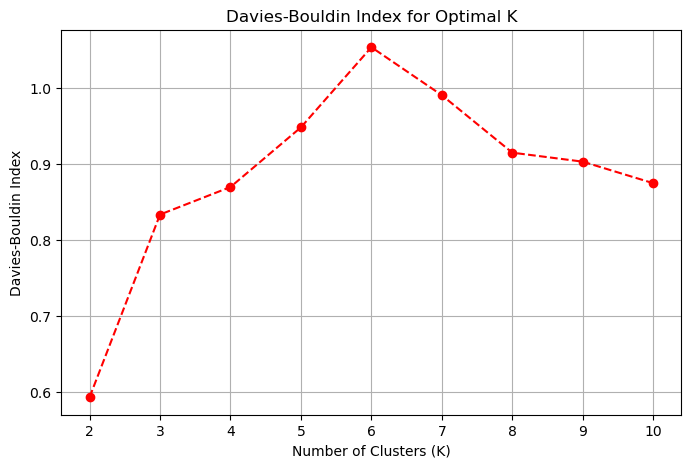

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different values of K
dbi_scores = []
K_range = range(2, 11)  # DBI requires at least 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = davies_bouldin_score(X_scaled, labels)
    dbi_scores.append(score)

# Plot Davies-Bouldin Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, dbi_scores, marker='o', linestyle='--', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### **Comparison of Clustering Evaluation Metrics**
| Metric               | Purpose                                      | Interpretation |
|----------------------|----------------------------------------------|------------------|
| **Elbow Method**       | Finds optimal K by minimizing WCSS          | Look for the "elbow" |
| **Silhouette Score**   | Measures separation & cohesion              | **Higher is better** |
| **Davies-Bouldin Index** | Measures compactness & separation          | **Lower is better** |

### **Advantages**
✅ **Simple and fast** – Works well on large datasets.  
✅ **Scales well** – Efficient for clustering large amounts of data.  
✅ **Interpretable** – Results are easy to understand.

### **Limitations**
❌ **Choosing K is tricky** – The algorithm requires a predefined number of clusters.  
❌ **Sensitive to outliers** – Outliers can significantly shift centroids.  
❌ **Assumes spherical clusters** – Doesn’t work well with complex or non-spherical clusters.

### **Real-World Applications of K-Means**

✅ **Customer Segmentation** (E.g., grouping customers by spending habits)  
✅ **Anomaly Detection** (E.g., fraud detection in banking)  
✅ **Image Compression** (E.g., reducing colors in an image)  
✅ **Document Clustering** (E.g., grouping news articles by topic)

---


## Additional information

### Variants & Alternatives of K-Means
- **K-Medoids** – Uses actual data points as centroids (more robust to outliers).  
- **Mini-Batch K-Means** – A faster version of K-Means that processes small batches of data.  
- **Fuzzy C-Means (Soft Clustering)** – Assigns probabilities instead of hard assignments.  
- **Gaussian Mixture Models (GMMs)** – A probabilistic clustering method using Gaussian distributions.


### Some more Clustering algorithms
- **Agglomerative Clustering** – A bottom-up approach, merging clusters iteratively.  
- **Divisive Clustering** – A top-down approach, splitting clusters recursively.  
- **DBSCAN (Density-Based Clustering)** – Can detect noise and works with arbitrary shapes.  
- **Mean-Shift Clustering** – Mode-seeking algorithm for non-parametric clustering.  
- **Spectral Clustering** – Uses graph theory for clustering complex structures.  


## Other clustering algorithms

### DBSCAN: An Alternative to K-Means for Clustering 🚀  

While **K-Means** works well for spherical clusters, it struggles with **irregular shapes** and **varying densities**. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a powerful alternative that can detect clusters of **arbitrary shape** and **handle outliers**.


### How DBSCAN Works
DBSCAN groups points based on **density** rather than distance from centroids. It classifies points into three categories:  

1. **Core Points**: Have at least **MinPts** neighbors within a given radius (**ε**).  
2. **Border Points**: Are within **ε** of a core point but have fewer than **MinPts** neighbors.  
3. **Noise Points**: Are neither core nor border points (outliers).


### DBSCAN vs. K-Means
| Feature         | K-Means | DBSCAN |
|----------------|--------|--------|
| **Cluster Shape** | Spherical | Any shape |
| **Outlier Handling** | Poor | Good |
| **Number of Clusters** | Must be predefined (K) | Determined automatically |
| **Works on Large Datasets?** | Yes | Yes, but slower for high-dimensional data |


### Why DBSCAN is Useful
✅ **Handles irregular clusters** (e.g., moon-shaped clusters).  
✅ **Automatically detects the number of clusters** (no need to specify K).  
✅ **Identifies outliers as noise points**.  


### When to Use K-Means vs. DBSCAN
- **Use K-Means** if you expect **spherical clusters** and need a fast, scalable solution.  
- **Use DBSCAN** if clusters have **irregular shapes**, contain **noise**, or K is unknown.  


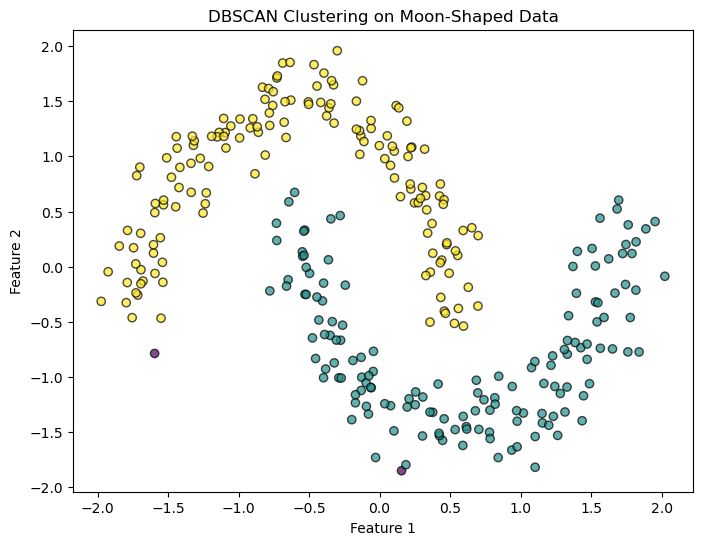

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate non-spherical (moon-shaped) data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # eps = neighborhood radius, min_samples = min points to form a core
labels = dbscan.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('DBSCAN Clustering on Moon-Shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### **Real-World Application of DBSCAN: Fraud Detection** 🔍  


### **Other DBSCAN Applications**
🔹 **Intrusion Detection** (Identifying unusual network traffic)  
🔹 **Customer Segmentation** (Finding niche customer groups)  
🔹 **Astronomy** (Detecting galaxy clusters)  


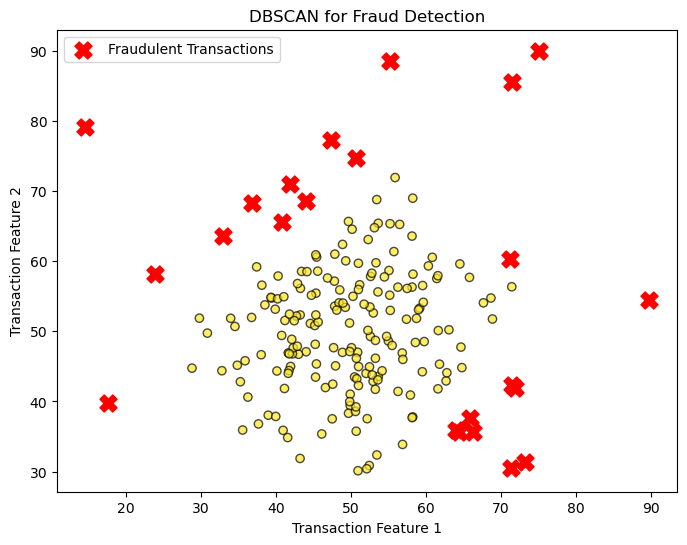

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data: Normal transactions (dense cluster) + Fraudulent transactions (outliers)
np.random.seed(42)
normal_transactions = np.random.normal(loc=[50, 50], scale=[10, 10], size=(200, 2))  # Dense cluster
fraud_transactions = np.random.uniform(low=[10, 10], high=[90, 90], size=(5, 2))  # Sparse outliers

# Combine normal and fraud transactions
X = np.vstack((normal_transactions, fraud_transactions))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters for better anomaly detection
labels = dbscan.fit_predict(X_scaled)

# Identify outliers (labeled as -1 by DBSCAN)
outliers = X[labels == -1]

# Plot transactions
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', marker='X', s=150, label='Fraudulent Transactions')
plt.title('DBSCAN for Fraud Detection')
plt.xlabel('Transaction Feature 1')
plt.ylabel('Transaction Feature 2')
plt.legend()
plt.show()